<a href="https://colab.research.google.com/github/Rami-RK/Gesture_Recognition_Soli_Radar_Data/blob/main/Soli_Data__Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
%matplotlib inline
from matplotlib import pyplot as plt, rcParams, rc
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
labels = [i for i in range(0,11)] # gesture
channel = [0,1,2,3] # data from 4 receiver antenas capturing 
# frame_number --> Not uniform, different frame number for different session
# for uniformity only 20 frame have been selected for all the dataset
instance = [i for i in range(0,25)] # each gesture 25 times from each users 
session = [i for i in range(0,10)] # 10 useers


#### Making Path list for training data

In [3]:
folder_path = 'D:\\Project_IITD\\Soli Data\\dsp'
train_list = []
for x in labels:
    for y in session:
        for z in instance:
            train_list.append(folder_path+'\\{0}_{1}_{2}.h5'.format(x,y,z))

In [4]:
train_list[0]

'D:\\Project_IITD\\Soli Data\\dsp\\0_0_0.h5'

In [ ]:
len(train_list)

2750

#### Path list of Data for cross-session performance evaluation (NOT USED)
 * And to explore personalized gesture recognition (i.e., classifier trained on a per-user basis)

In [ ]:
list_of_all=os.listdir('D:\\Project_IITD\\Soli Data\\dsp')

In [ ]:
list_of_all[0]

'0_0_0.h5'

In [ ]:
len(list_of_all)

5502

In [ ]:
per_user_list=[]
for i  in list_of_all:
    if ('D:\\Project_IITD\\Soli Data\\dsp\\'+i) not in train_list:
        per_user_list.append('D:\\Project_IITD\\Soli Data\\dsp\\'+i)

In [ ]:
len(per_user_list)

2752

#### Visualizing few samples of dataset

In [ ]:
file_name = 'D:/Project_IITD/Soli Data/dsp/0_9_0.h5'

In [ ]:
# code to extract data in python provided by author
import h5py
use_channel = 0 # data of channel 0 will be selected
with h5py.File(file_name, 'r') as f:
    # Data and label are numpy arrays
    data = f['ch{}'.format(use_channel)][()]
    label = f['label'][()]
print(data.shape)
print(type(data))
print(len(label))
## Data and label are numpy arrays

(69, 1024)
<class 'numpy.ndarray'>
69


In [ ]:
data = data.reshape(data.shape[0],32,32) # reshaping the image into 32 X32

In [ ]:
data.shape # 28 frames of 32 X 32 RDI images in any one channel of this sample

(69, 32, 32)

In [ ]:
data[0] ## selcting frame zero

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

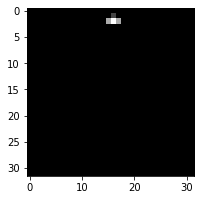

In [ ]:
plt.imshow(data[0])#.set_cmap('hot')
plt.show() # for channel 3

In [ ]:
def h5file_array(file_name,use_channel = 0):
    
    with h5py.File(file_name, 'r') as f:
        data = f['ch{}'.format(use_channel)][()]
        label = f['label'][()]
    return data, label
    

In [ ]:
data, label = h5file_array(file_name,use_channel=1)
data = data.reshape(data.shape[0],32,32)

#### Plotting and visualiasing  20 frames

#### Making funtions for multiple plots

In [ ]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

C:\Users\hP\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


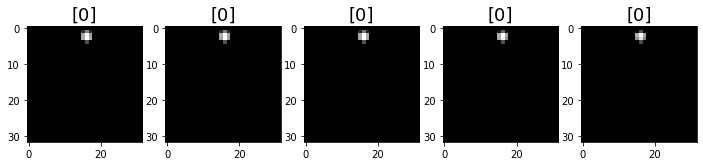

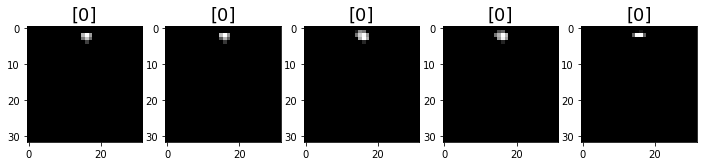

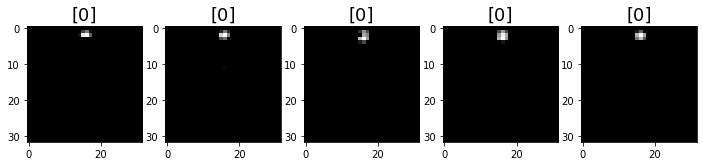

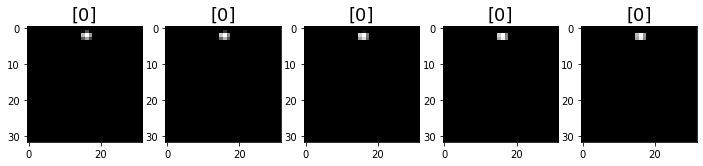

In [ ]:
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

#### plotting another one sample for channel 1 and 3

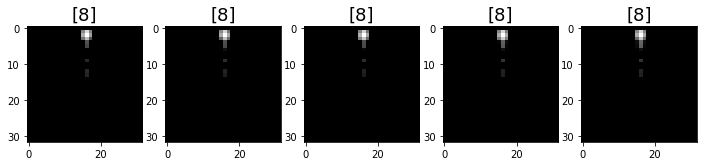

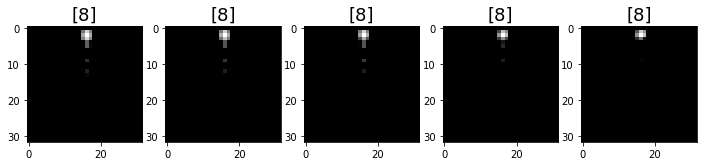

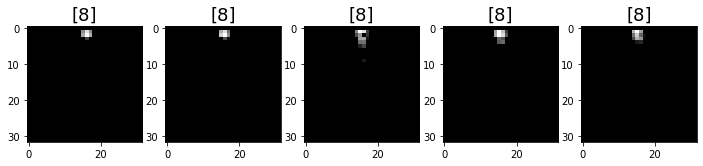

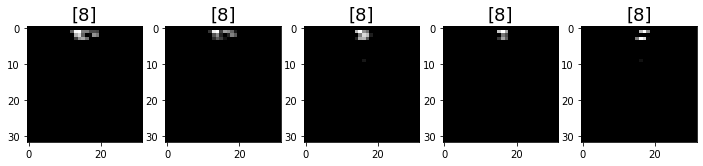

In [ ]:
# Channel 1
file_name1 = train_list[2000]
data, label = h5file_array(file_name1,use_channel=1)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

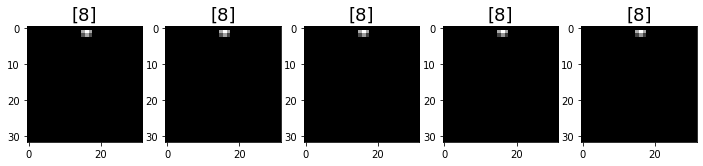

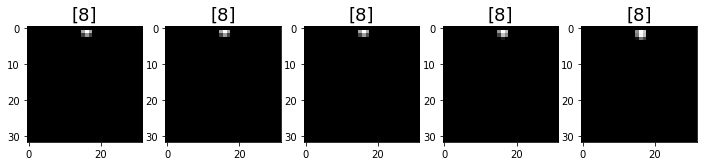

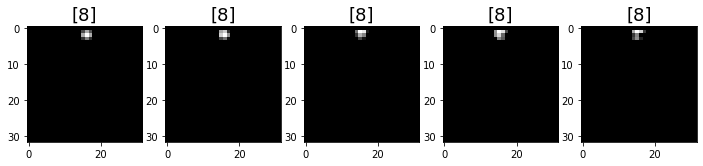

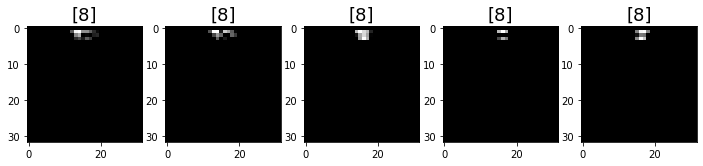

In [ ]:
# Channel 3
file_name1 = train_list[2000]
data, label = h5file_array(file_name1,use_channel=3)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

### Making a numpy dataset in format [samples,frame, height,width,channel]
### Label in format [samples,frame,1]

In [ ]:
dataset = np.zeros([len(train_list),20,32,32,4])

In [ ]:
labels = np.zeros([len(train_list),20,1])

In [ ]:
labels.shape

(2750, 20, 1)

In [ ]:
ch=0

In [ ]:
dataset[0,:,:,:,ch].shape

(20, 32, 32)

In [ ]:
i=2000
ch = 1
file_name = train_list[i]
data, label = h5file_array(file_name,use_channel=ch)
data = data.reshape(data.shape[0],32,32)
data = data[:20,:,:]
label = label[:20]
dataset[i,:,:,:,ch] = data
labels[i] = label

In [ ]:
d1=dataset[2000,:,:,:,1]

In [ ]:
d1

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

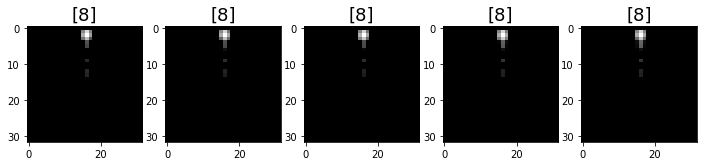

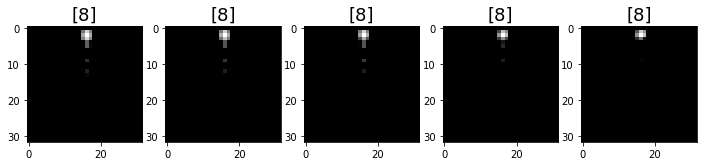

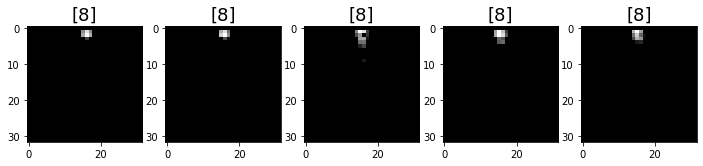

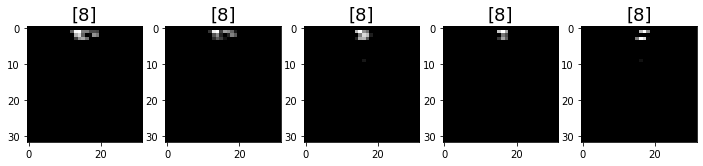

In [ ]:
plots(d1[:5], titles=label[:5])
plots(d1[5:10], titles=label[5:10])
plots(d1[10:15], titles=label[10:15])
plots(d1[15:20], titles=label[15:20])

In [ ]:
for i in range(len(train_list)):
    for ch in range(4):
        file_name = train_list[i]
        data, label = h5file_array(file_name,use_channel=ch)
        data = data.reshape(data.shape[0],32,32)
        data = data[:20,:,:]
        label = label[:20]
        dataset[i,:,:,:,ch] = data
        labels[i] = label

In [ ]:
dataset.shape

(2750, 20, 32, 32, 4)

In [ ]:
labels.shape

(2750, 20, 1)

#### Saving dataset and labels as numpy in disk 

In [ ]:
np.save('D:\\Project_IITD\\Soli Data\\dsp\\data',dataset)

In [ ]:
np.save('D:\\Project_IITD\\Soli Data\\dsp\\labels',labels)

In [ ]:
# for loading the numpy data back
#labels=np.load('D:\\Project_IITD\\Soli Data\\dsp\\labels.npy')

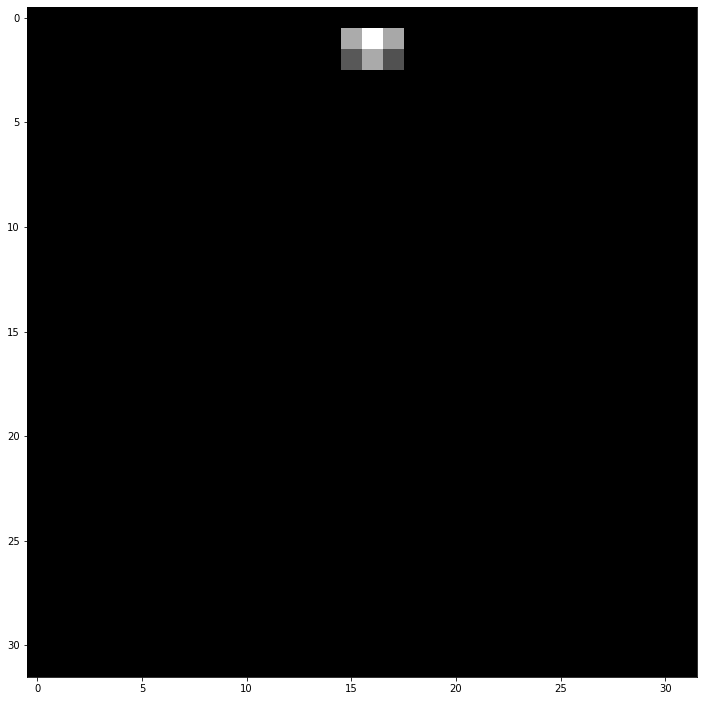

In [ ]:
plots(dataset[2000,:1,:,:,3])

In [ ]:
labels[2000,:,:]

array([[8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.]])

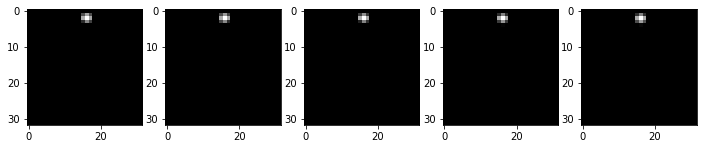

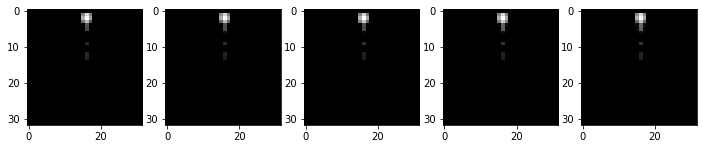

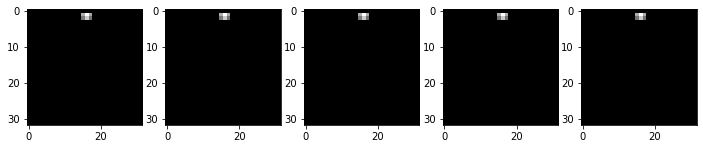

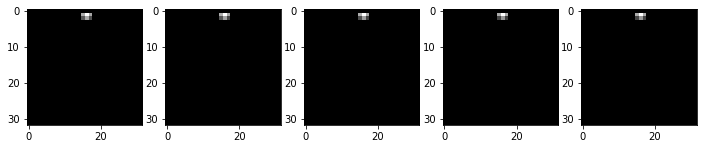

In [ ]:
plots(dataset[2000,:5,:,:,0])
plots(dataset[2000,:5,:,:,1])
plots(dataset[2000,:5,:,:,2])
plots(dataset[2000,:5,:,:,3])

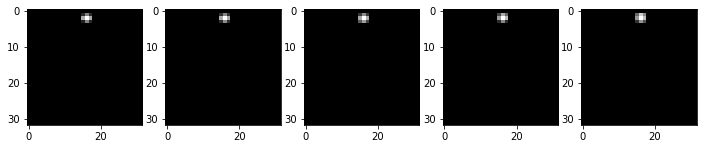

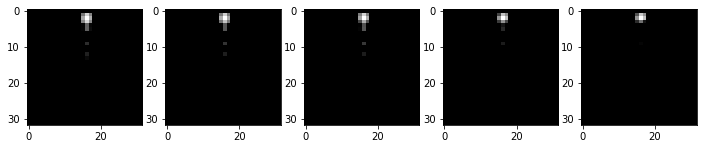

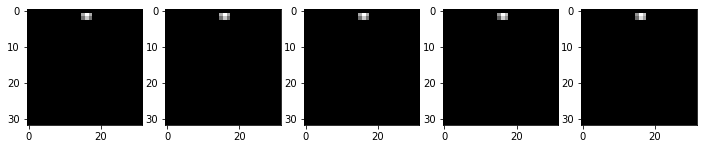

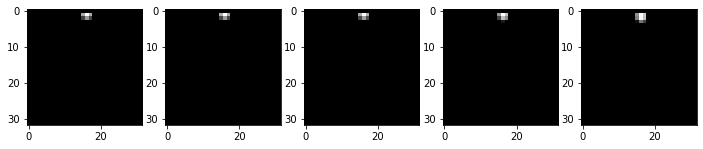

In [ ]:
plots(dataset[2000,5:10,:,:,0])
plots(dataset[2000,5:10,:,:,1])
plots(dataset[2000,5:10,:,:,2])
plots(dataset[2000,5:10,:,:,3])

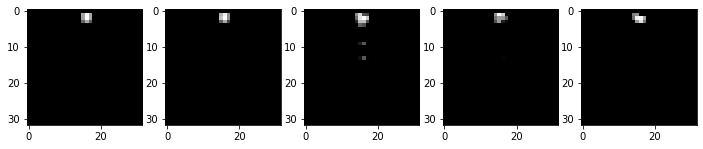

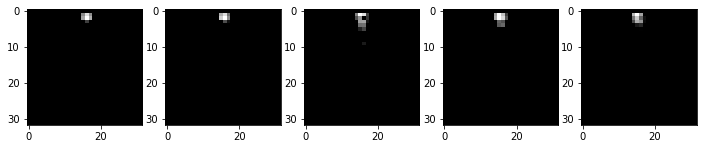

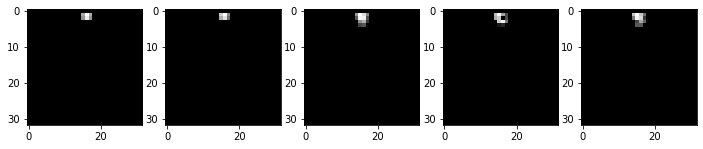

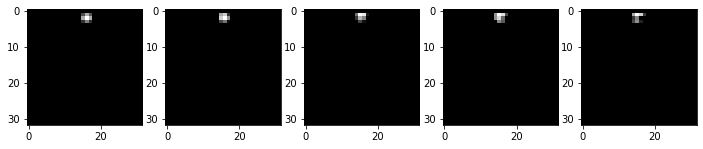

In [ ]:
plots(dataset[2000,10:15,:,:,0]) 
plots(dataset[2000,10:15,:,:,1]) 
plots(dataset[2000,10:15,:,:,2]) 
plots(dataset[2000,10:15,:,:,3]) 

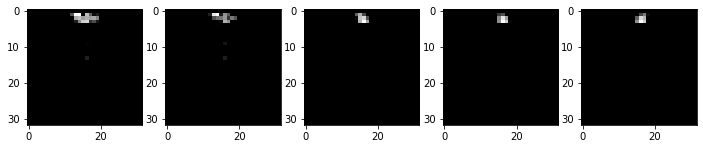

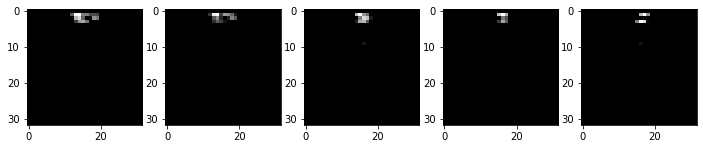

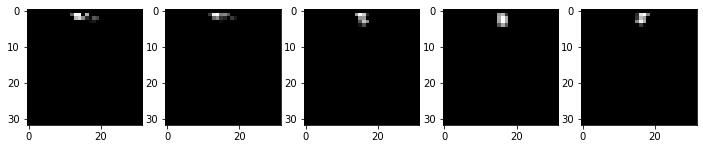

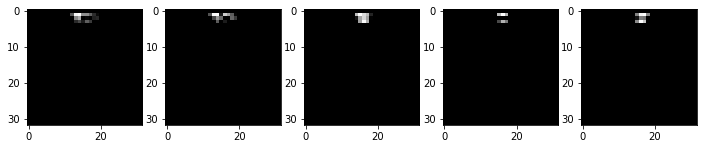

In [ ]:
plots(dataset[2000,15:20,:,:,0])
plots(dataset[2000,15:20,:,:,1])
plots(dataset[2000,15:20,:,:,2])
plots(dataset[2000,15:20,:,:,3])